# R68 Efficiencies
This notebook plots the trigger and cut efficiencies used in the R68 analysis.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

exec(open("../analysis_notebooks/nb_setup.py").read()) #Is there a better way to do this?

from R68_efficiencies import *

../mplstyles
3.4.2
/Users/villaa/R68_paper2019/mplstyles


In [2]:
E_thresh=50 #[eV] Possible analysis threshold
#E_test=np.linspace(0,1e3,1000)
E_test=np.logspace(-5,3.5,2000)

fig_w=20

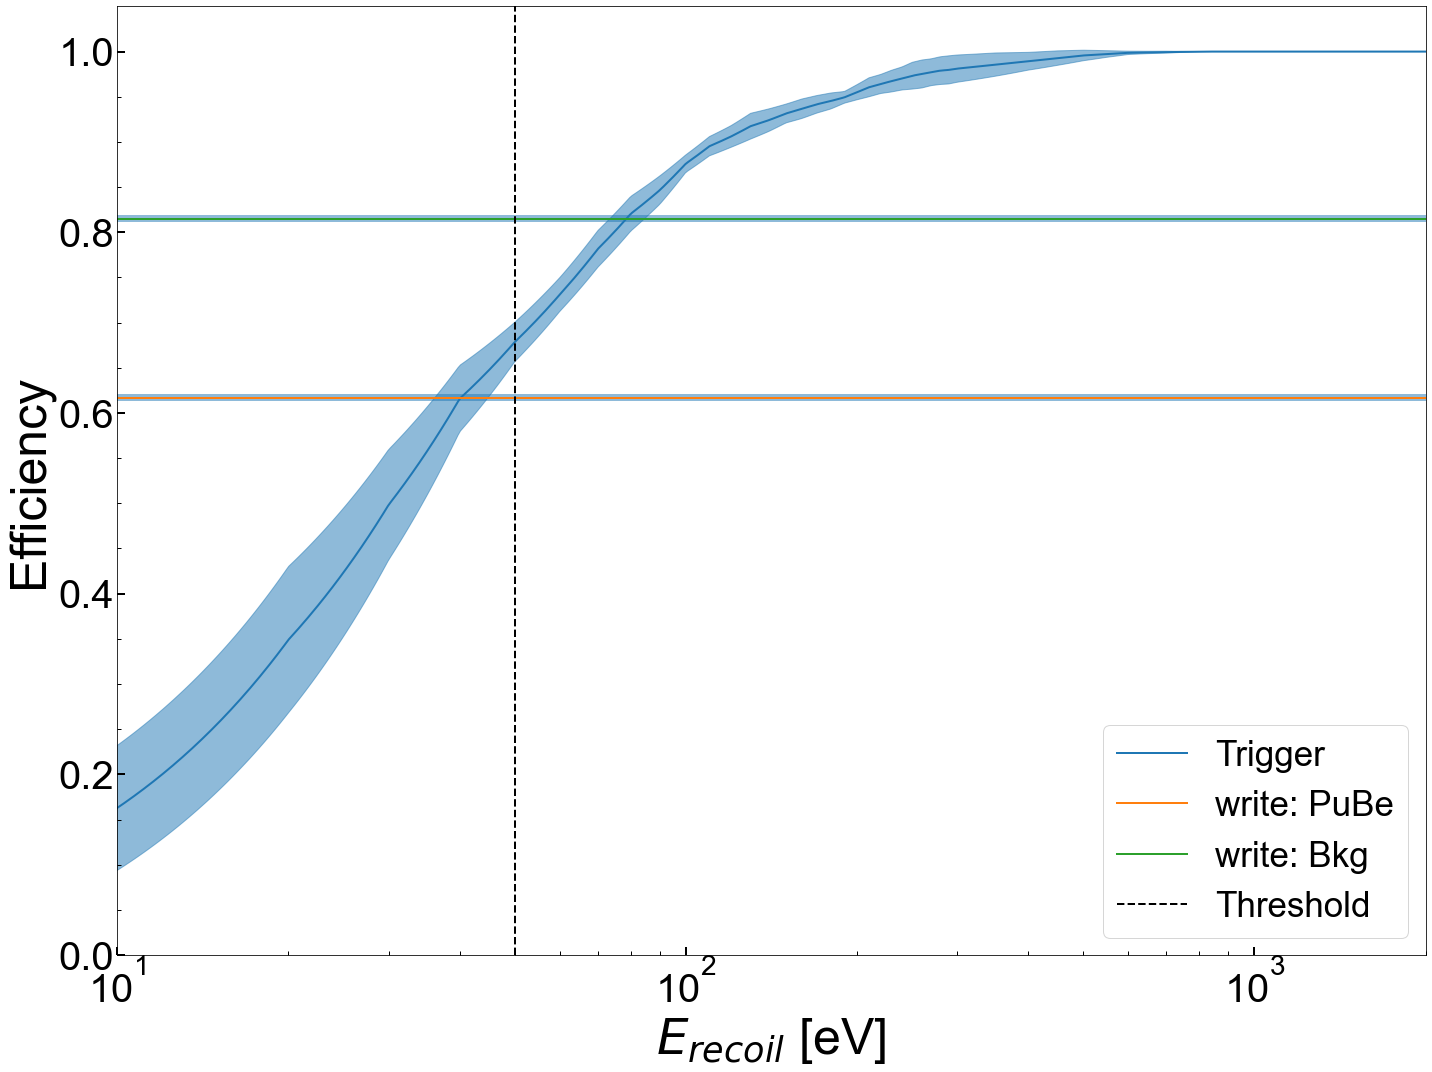

In [3]:
#Trigger efficiency function

fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

color=next(ax._get_lines.prop_cycler)['color']
ax.plot(E_test,trigEff(E_test),color=color,label='Trigger')
ax.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=color)


ax.axhline(eff_write, color = next(ax._get_lines.prop_cycler)['color'], label='write: PuBe')
ax.axhspan(eff_write-deff_write, eff_write+deff_write, alpha=0.5)

ax.axhline(eff_write_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='write: Bkg')
ax.axhspan(eff_write_bkg-deff_write_bkg, eff_write_bkg+deff_write_bkg, alpha=0.5)


ax.axvline(E_thresh, color='k', linestyle='--', linewidth=2, label='Threshold')

ax.set_xlim(10,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Efficiency')

ax.legend()
plt.tight_layout()

#plt.savefig('figures/trig_eff.png')
#plt.savefig('figures/trig_eff.eps')
#plt.savefig('figures/trig_eff.pdf')

Cut Eff Fit Params:  [1.99011656e+01 3.39505540e+01 4.07808092e-01 6.02809942e-05]
Cut Eff Fit Uncert:  0.03230678598469722
Cut Eff High: 0.51633498 +/- 0.01294113


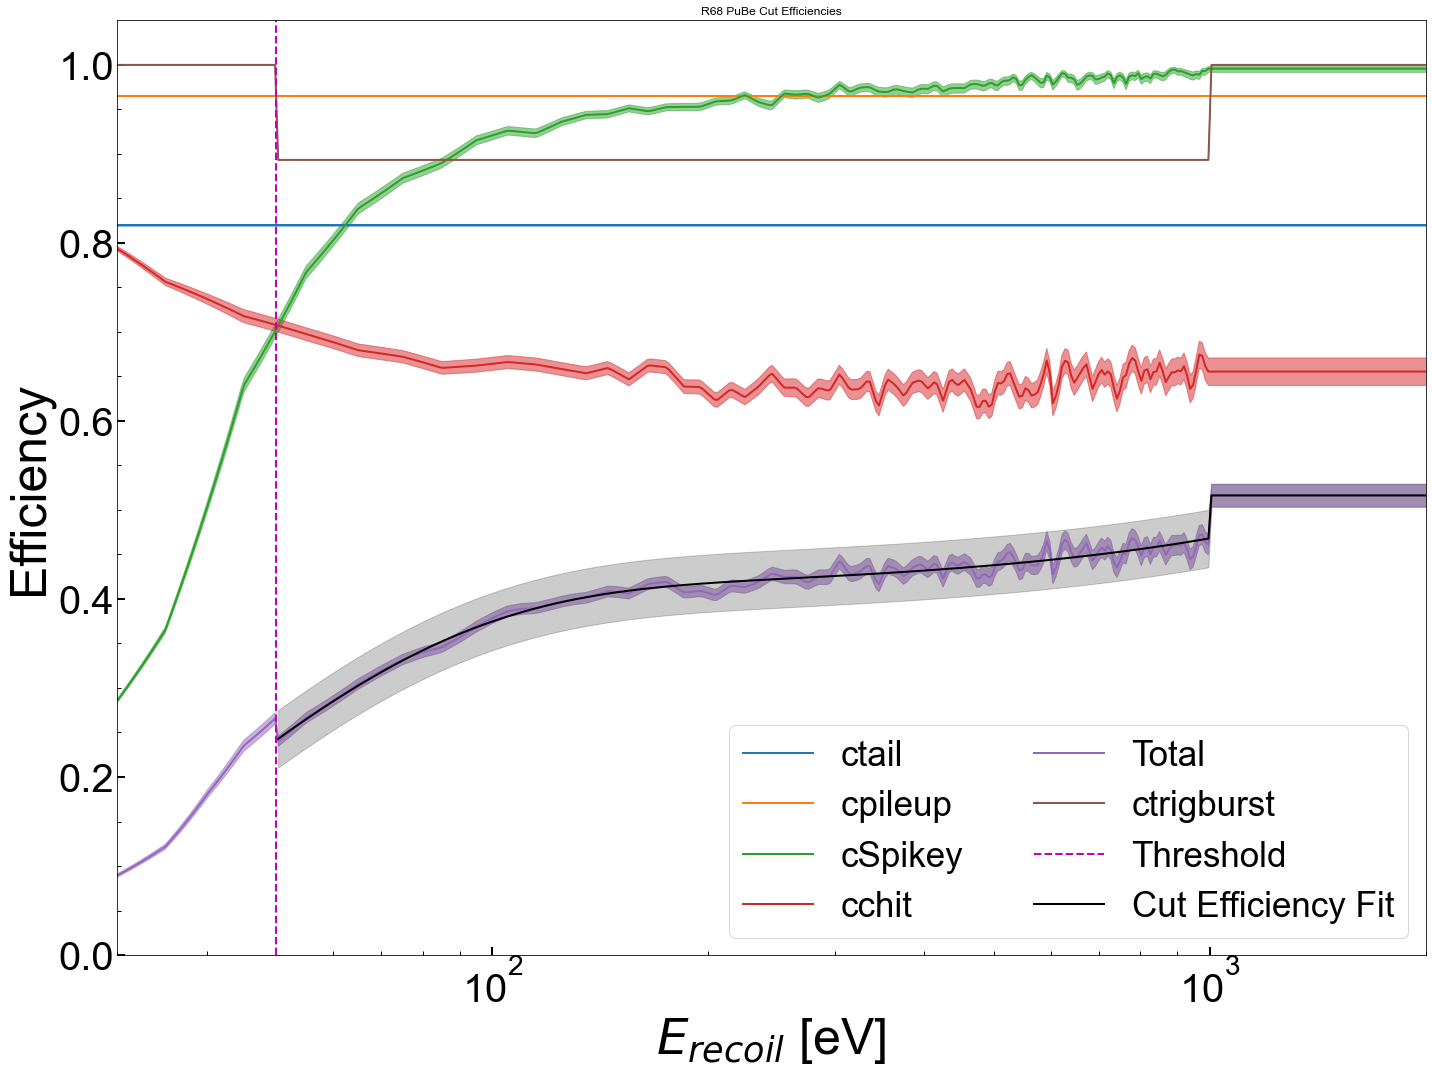

In [4]:
#Cut efficiencies
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))


ax.axhline(eff_tail, color = next(ax._get_lines.prop_cycler)['color'], label='ctail')
ax.axhspan(eff_tail-deff_tail, eff_tail+deff_tail, alpha=0.5)

ax.axhline(eff_pileup, color = next(ax._get_lines.prop_cycler)['color'], label='cpileup ')
ax.axhspan(eff_pileup-deff_pileup, eff_pileup+deff_pileup, alpha=0.5)

#ax.axhline(eff_trigburst, color = next(ax._get_lines.prop_cycler)['color'], label='ctrigburst')
#ax.axhspan(eff_trigburst-deff_trigburst, eff_trigburst+deff_trigburst, alpha=0.5)

line,=ax.plot(E_test, spikeEff(E_test), label='cSpikey')
ax.fill_between(E_test, spikeEff(E_test)-dspikeEff(E_test)[1], spikeEff(E_test)+dspikeEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,chisqEff(E_test), label='cchit')
ax.fill_between(E_test, chisqEff(E_test)-dchisqEff(E_test)[1], chisqEff(E_test)+dchisqEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test, allEff(E_test), label='Total')
ax.fill_between(E_test, allEff(E_test)-dallEff(E_test)[1], allEff(E_test)+dallEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test, trigburstEff(E_test), label='ctrigburst')
ax.fill_between(E_test, trigburstEff(E_test)-dtrigburstEff(E_test)[1], trigburstEff(E_test)+dtrigburstEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

ax.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')

#Fit a smooth function to total efficiency
from scipy.optimize import curve_fit
def effFit_func(x,x0,sigma,a,b):
    return (x>x0)*(a+b*x)*(1-np.exp(-(x-x0)/sigma))
Efitmin=50
Efitmax=1000
cfit=(E_test>=Efitmin) & (E_test<Efitmax)
popt,pcov=curve_fit(effFit_func,E_test[cfit], allEff(E_test)[cfit],p0=[30,30,0.45,1e-4])

#Set a single uncertainty for the fit to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( effFit_func(E_test,*popt) - (allEff(E_test)-dallEff(E_test)[1]))[cfit])
maxpos=np.max(np.abs( effFit_func(E_test,*popt) - (allEff(E_test)+dallEff(E_test)[0]))[cfit])

dEffFit=max(maxneg,maxpos)

print('Cut Eff Fit Params: ',popt)
print('Cut Eff Fit Uncert: ',dEffFit)
print(f'Cut Eff High: {np.mean(cutEff(E_test[E_test>Efitmax])):.8f} +/- {np.max(dcutEff(E_test[E_test>Efitmax])):.8f}')

#ax.plot(E_test[cfit],effFit_func(E_test,*popt)[cfit],'k',label='Cut Efficiency Fit')
#ax.fill_between(E_test[cfit],(effFit_func(E_test,*popt)-dEffFit)[cfit],(effFit_func(E_test,*popt)+dEffFit)[cfit],color='k',alpha=0.2)

def cutEffFit(E):
    eff=np.ones_like(E)
    eff[(E>=50)&(E<1000)]=effFit_func(E[(E>=50)&(E<1000)], 1.99011656e+01, 3.39505540e+01, 4.07808092e-01, 6.02809942e-05)
    eff[E>=1000]=0.51633498
    return eff

def dcutEffFit(E):
    deff=np.zeros_like(E)
    deff[(E>=50)&(E<1000)]=0.03230678598469722
    deff[E>=1000]=0.01294113
    return deff

ax.plot(E_test[E_test>Efitmin],cutEffFit(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax.fill_between(E_test[E_test>Efitmin],(cutEffFit(E_test)-dcutEffFit(E_test))[E_test>Efitmin],(cutEffFit(E_test)+dcutEffFit(E_test))[E_test>Efitmin],color='k',alpha=0.2)


#plt.plot(E_test,cutEffFit(E_test),'--')

ax.set_title('R68 PuBe Cut Efficiencies')
ax.set_xlim(30,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Efficiency')
ax.legend(ncol=2)

plt.tight_layout()

# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.savefig('figures/cut_effs.png')
#plt.savefig('figures/cut_effs.eps')
#plt.savefig('figures/cut_effs.pdf')

Cut Eff Fit Params: [2.12459234e+01 3.66441228e+01 7.02002489e-01 1.40780632e-06]
Cut Eff Fit Uncert: 0.2541391332607436


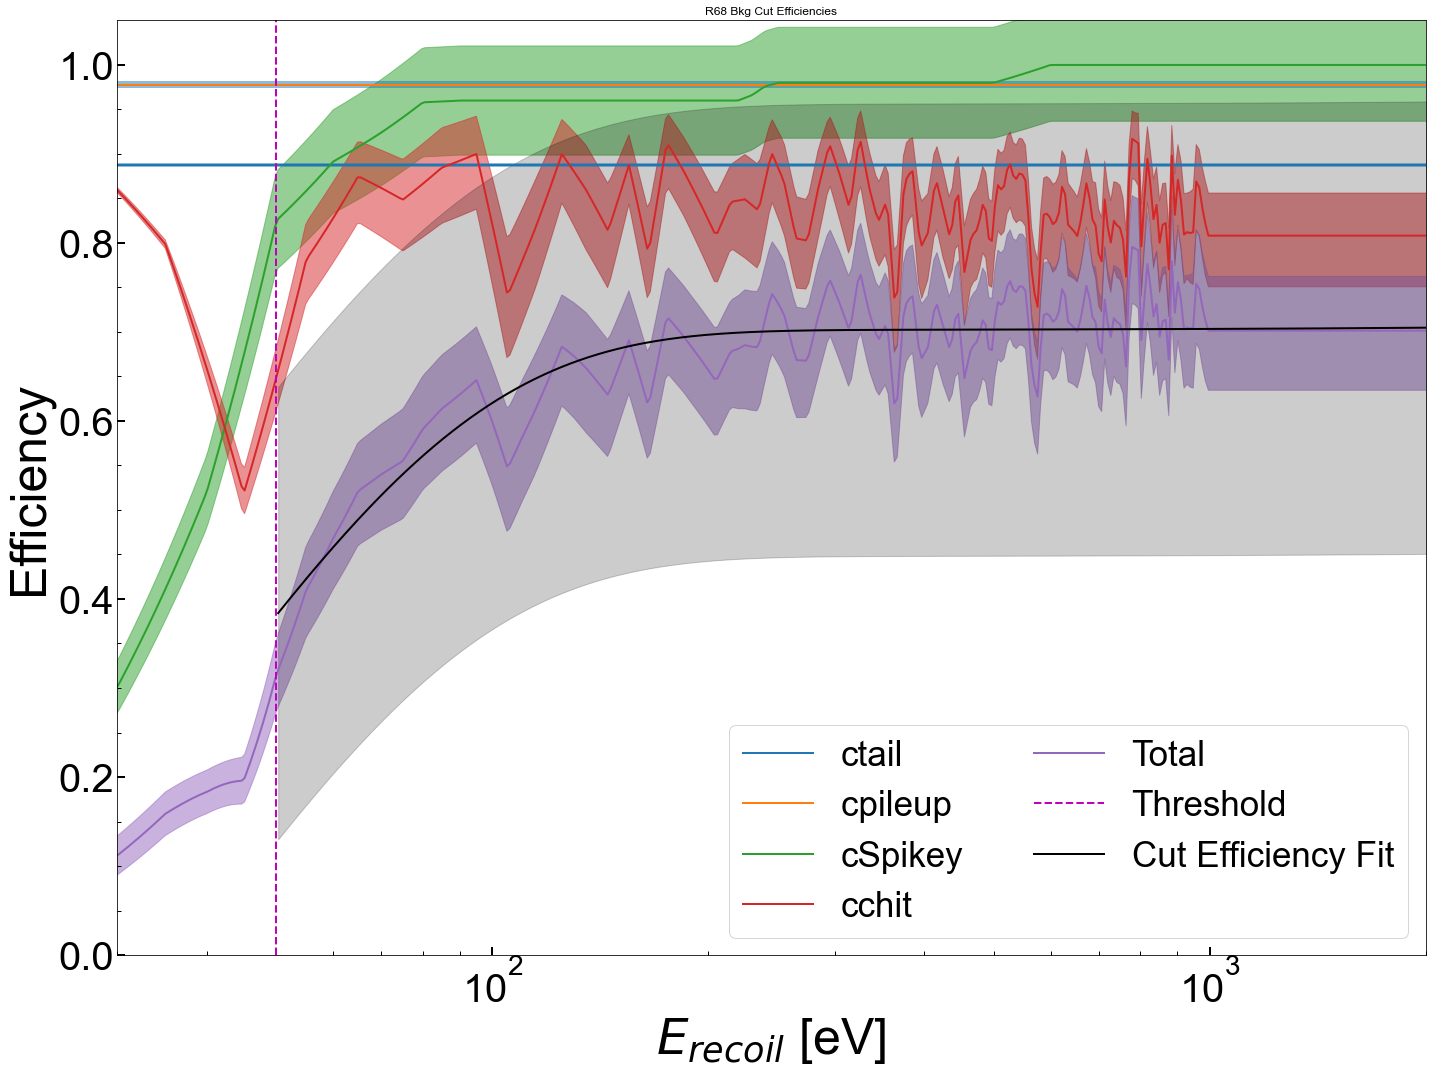

In [5]:
#Cut efficiencies for bkg data

fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))


ax.axhline(eff_tail_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='ctail')
ax.axhspan(eff_tail_bkg-deff_tail_bkg, eff_tail_bkg+deff_tail_bkg, alpha=0.5)

ax.axhline(eff_pileup_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='cpileup ')
ax.axhspan(eff_pileup_bkg-deff_pileup_bkg, eff_pileup_bkg+deff_pileup_bkg, alpha=0.5)



line,=ax.plot(E_test, spikeEff_bkg(E_test), label='cSpikey')
ax.fill_between(E_test, spikeEff_bkg(E_test)-dspikeEff_bkg(E_test)[1], spikeEff_bkg(E_test)+dspikeEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,chisqEff_bkg(E_test), label='cchit')
ax.fill_between(E_test, chisqEff_bkg(E_test)-dchisqEff_bkg(E_test)[1], chisqEff_bkg(E_test)+dchisqEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test, allEff_bkg(E_test), label='Total')
ax.fill_between(E_test, allEff_bkg(E_test)-dallEff_bkg(E_test)[1], allEff_bkg(E_test)+dallEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

next(ax._get_lines.prop_cycler)['color']
#line,=ax.plot(E_test, trigburstEff_bkg(E_test), label='ctrigburst')
#ax.fill_between(E_test, trigburstEff_bkg(E_test)-dtrigburstEff_bkg(E_test)[1], trigburstEff_bkg(E_test)+dtrigburstEff_bkg(E_test)[0], 
#                alpha=0.5, color=line.get_color())

ax.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')

#Fit with smooth function
Efitmin=50
popt,pcov=curve_fit(effFit_func,E_test[E_test>Efitmin], allEff_bkg(E_test)[E_test>Efitmin],p0=[30,30,0.45,1e-4])

#Set a single uncertainty for the fir to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( effFit_func(E_test,*popt) - (cutEff_bkg(E_test)-dcutEff_bkg(E_test)[1]))[E_test>Efitmin])
maxpos=np.max(np.abs( effFit_func(E_test,*popt) - (cutEff_bkg(E_test)+dcutEff_bkg(E_test)[0]))[E_test>Efitmin])
dEffFit_bkg=max(maxneg,maxpos)
#ax.plot(E_test[E_test>Efitmin],effFit_func(E_test,*popt)[E_test>Efitmin],'k',label='Cut Efficiency Fit')
#ax.fill_between(E_test[E_test>Efitmin],(effFit_func(E_test,*popt)-dEffFit_bkg)[E_test>Efitmin],(effFit_func(E_test,*popt)+dEffFit_bkg)[E_test>Efitmin],color='k',alpha=0.2)

print('Cut Eff Fit Params:',popt)
print('Cut Eff Fit Uncert:',dEffFit_bkg)

def cutEffFit_bkg(E):
    return effFit_func(E, 2.12459234e+01,  3.66441228e+01,  7.02002489e-01, 1.40780632e-06)
def dcutEffFit_bkg(E):
    return 0.2541391332607436

ax.plot(E_test[E_test>Efitmin],cutEffFit_bkg(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax.fill_between(E_test[E_test>Efitmin],(cutEffFit_bkg(E_test)-dcutEffFit_bkg(E_test))[E_test>Efitmin],(cutEffFit_bkg(E_test)+dcutEffFit_bkg(E_test))[E_test>Efitmin],color='k',alpha=0.2)


#plt.plot(E_test,cutEffFit_bkg(E_test),'--')

ax.set_title('R68 Bkg Cut Efficiencies')
ax.set_xlim(30,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Efficiency')
ax.legend(ncol=2)

plt.tight_layout()

# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.savefig('figures/cut_effs_bkg.png');
#plt.savefig('figures/cut_effs_bkg.eps');
#plt.savefig('figures/cut_effs_bkg.pdf');